In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
!pip install tensorflow

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.losses as losses
import tensorflow.keras.callbacks as callbacks
%matplotlib inline

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [3]:
DATASET_PATH = "/home/omkar/kaggle/kaggle_bee_vs_wasp"

label_csv = os.path.join(DATASET_PATH, 'labels.csv')

In [4]:
label_df = pd.read_csv(label_csv)
label_df.head(35)

,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,1,bee1\10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,2,bee1\10024864894_6dc54d4b34_n.jpg,1,0,0,0,1,0,1,bee
2,3,bee1\10092043833_7306dfd1f0_n.jpg,1,0,0,0,1,1,0,bee
3,4,bee1\1011948979_fc3637e779_w.jpg,1,0,0,0,1,0,1,bee
4,5,bee1\10128235063_dca17db76c_n.jpg,1,0,0,0,1,0,0,bee
5,6,bee1\10130729734_f68738333e_w.jpg,1,0,0,0,1,0,0,bee
6,7,bee1\10166485783_9cd6706c72_n.jpg,1,0,0,0,1,0,0,bee
7,8,bee1\10179824_84803290ac_m.jpg,1,0,0,0,1,0,0,bee
8,9,bee1\10197482094_0176d1bacb_n.jpg,1,0,0,0,1,0,0,bee
9,10,bee1\10242298546_aac12f5223_n.jpg,1,0,0,0,1,0,0,bee


In [5]:
def dataset_distribution(row):
  if row['is_validation'] == 0 and row['is_final_validation'] == 0:
    return 'train'
  elif row['is_validation'] == 1:
    return 'validation'
  else:
    return 'test'
  
label_df['type'] = label_df.apply(dataset_distribution, axis = 1)
print('Number of images in each set:')
label_df['type'].value_counts()



Number of images in each set:


train         7939
test          1763
validation    1719
Name: type, dtype: int64

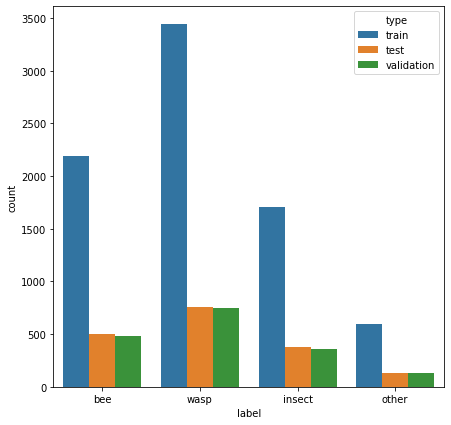

In [6]:
plt.figure(figsize = (7,7))
sb.countplot(x = 'label', hue='type', data= label_df)
plt.show()

In [7]:
label_df['path'] = label_df['path'].str.replace('\\', os.sep)
label_df['path'].head()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0    bee1/10007154554_026417cfd0_n.jpg
1    bee1/10024864894_6dc54d4b34_n.jpg
2    bee1/10092043833_7306dfd1f0_n.jpg
3     bee1/1011948979_fc3637e779_w.jpg
4    bee1/10128235063_dca17db76c_n.jpg
Name: path, dtype: object

In [8]:
train_df = label_df[label_df['type'] == 'train']
validation_df = label_df[label_df['type'] == 'validation']
test_df = label_df[label_df['type'] == 'test']

In [9]:
image_size = (256,256)
BATCH_SIZE = 32
EPOCHS = 15
SEED = 42

In [10]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

train_set = datagen.flow_from_dataframe(train_df, 
                                            directory=DATASET_PATH, 
                                            x_col="path", 
                                            y_col="label",
                                            target_size=image_size,
                                            validate_filenames=False,
                                            seed = 42
                                        
                                           )


validation_set = datagen.flow_from_dataframe(validation_df, 
                                            directory=DATASET_PATH, 
                                            x_col="path", 
                                            y_col="label",
                                            target_size=image_size,
                                            validate_filenames=False,
                                            seed = 42
                                           )

test_set = datagen.flow_from_dataframe(test_df, 
                                      directory=DATASET_PATH, 
                                      x_col="path", 
                                      y_col="label",
                                      target_size=image_size,
                                      validate_filenames=False,
                                      seed = 42
                                      )


Found 7939 non-validated image filenames belonging to 4 classes.
Found 1719 non-validated image filenames belonging to 4 classes.
Found 1763 non-validated image filenames belonging to 4 classes.


In [11]:
number_of_classes = len(label_df['label'].unique())
print("number_of_classes : ",number_of_classes)

number_of_classes :  4


In [12]:

model = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=128, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[256, 256, 3]),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 256)     295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 512)       0         
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [14]:
history = model.fit(
    train_set,
    validation_data=validation_set,
    epochs=50
)

Epoch 1/50
249/249 [==============================] - 1782s 7s/step - loss: 0.5782 - binary_accuracy: 0.7386 - val_loss: 0.5642 - val_binary_accuracy: 0.7500
Epoch 2/50
249/249 [==============================] - 1765s 7s/step - loss: 0.5633 - binary_accuracy: 0.7500 - val_loss: 0.5625 - val_binary_accuracy: 0.7500
Epoch 3/50
249/249 [==============================] - 1765s 7s/step - loss: 0.5624 - binary_accuracy: 0.7500 - val_loss: 0.5624 - val_binary_accuracy: 0.7500
Epoch 4/50
249/249 [==============================] - 1767s 7s/step - loss: 0.5624 - binary_accuracy: 0.7500 - val_loss: 0.5623 - val_binary_accuracy: 0.7500
Epoch 5/50
249/249 [==============================] - 1765s 7s/step - loss: 0.5623 - binary_accuracy: 0.7500 - val_loss: 0.5623 - val_binary_accuracy: 0.7500
Epoch 6/50
249/249 [==============================] - 1765s 7s/step - loss: 0.5623 - binary_accuracy: 0.7500 - val_loss: 0.5623 - val_binary_accuracy: 0.7500
Epoch 7/50
249/249 [==============================] 

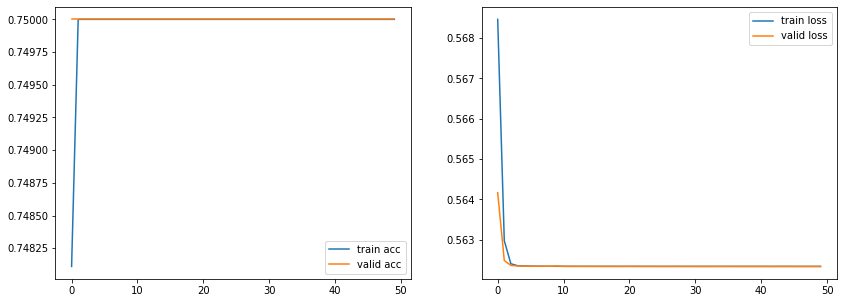

In [17]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='train acc')
plt.plot(val_acc, label='valid acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='train loss')
plt.plot(val_loss, label='valid loss')
plt.legend()

plt.show()

In [19]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print("Test accuracy:", test_acc)

56/56 - 86s - loss: 0.5623 - binary_accuracy: 0.7500
Test accuracy: 0.75
